### Importing librairies

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [52]:
data_df = pd.read_csv("../data/dynamic_software_quality_data.csv")
data_df.head()

,Day,S,I,R,dS_dt,dI_dt,dR_dt
0,0,990,10,0,-1.9800,1.4800,0.5000
1,1,984,16,0,-3.1685,2.2224,0.9461
2,2,984,15,1,-2.9889,2.0453,0.9436
3,3,981,18,1,-3.5978,2.4132,1.1846
4,4,978,21,1,-4.2103,2.7769,1.4334


In [53]:
data_df.describe()

,Day,S,I,R,dS_dt,dI_dt,dR_dt
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.500000,400.016667,61.550000,538.433333,-7.187629,0.636188,6.551440
std,34.785054,307.206442,63.303969,330.252329,8.208135,4.494317,6.802040
min,0.000000,161.000000,0.000000,0.000000,-24.643800,-7.005600,0.000000
25%,29.750000,161.000000,4.000000,196.250000,-12.837525,-2.200900,0.533375
50%,59.500000,198.500000,35.500000,727.000000,-3.078700,-0.090800,3.852900
75%,89.250000,660.000000,118.250000,835.000000,-0.201075,3.118150,12.894900
max,119.000000,990.000000,190.000000,839.000000,-0.000000,10.644500,20.605900


In [54]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     120 non-null    int64  
 1   S       120 non-null    int64  
 2   I       120 non-null    int64  
 3   R       120 non-null    int64  
 4   dS_dt   120 non-null    float64
 5   dI_dt   120 non-null    float64
 6   dR_dt   120 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 6.7 KB


In [55]:
data = []

for i in range(0, len(data_df)):
    item = {"D": data_df["Day"].iloc[i], "S":data_df["S"].iloc[i],
    "I": data_df["I"].iloc[i], "R": data_df["R"].iloc[i], "dS": data_df["dS_dt"].iloc[i],
    "dI": data_df["dI_dt"].iloc[i], "dR": data_df["dR_dt"].iloc[i]}

    data.append(item)


In [56]:
data[:8]

[{'D': np.int64(0),
  'S': np.int64(990),
  'I': np.int64(10),
  'R': np.int64(0),
  'dS': np.float64(-1.98),
  'dI': np.float64(1.48),
  'dR': np.float64(0.5)},
 {'D': np.int64(1),
  'S': np.int64(984),
  'I': np.int64(16),
  'R': np.int64(0),
  'dS': np.float64(-3.1685),
  'dI': np.float64(2.2224),
  'dR': np.float64(0.9461)},
 {'D': np.int64(2),
  'S': np.int64(984),
  'I': np.int64(15),
  'R': np.int64(1),
  'dS': np.float64(-2.9889),
  'dI': np.float64(2.0453),
  'dR': np.float64(0.9436)},
 {'D': np.int64(3),
  'S': np.int64(981),
  'I': np.int64(18),
  'R': np.int64(1),
  'dS': np.float64(-3.5978),
  'dI': np.float64(2.4132),
  'dR': np.float64(1.1846)},
 {'D': np.int64(4),
  'S': np.int64(978),
  'I': np.int64(21),
  'R': np.int64(1),
  'dS': np.float64(-4.2103),
  'dI': np.float64(2.7769),
  'dR': np.float64(1.4334)},
 {'D': np.int64(5),
  'S': np.int64(976),
  'I': np.int64(20),
  'R': np.int64(4),
  'dS': np.float64(-4.026),
  'dI': np.float64(2.6178),
  'dR': np.float64(1.40

### SIR Modeling

In [57]:
class SIRModel:
    def __init__(self, N=None, S_init=None, I_init=None, beta=None, gamma=None):
        self.N = N
        self.S = S_init
        self.I = I_init
        self.R = 0
        self.beta = beta
        self.gamma = gamma
        self.infection_rates = []
        self.recovery_rates = []
    
    def get_dS_dt(self, S, I):
        return -self.beta * S * (I/self.N)
    
    def get_dR_dt(self, I):
        return self.gamma * I

    def get_dI_dt(self, dS_dt, dR_dt):
        return -dS_dt - dR_dt
    
    def update_compartment(self):
        dS_dt = self.get_dS_dt(self.S, self.I)
        dR_dt = self.get_dR_dt(self.I)
        dI_dt = self.get_dI_dt(dS_dt, dR_dt)

        self.S += dS_dt
        self.I += dI_dt
        self.R += dR_dt

        self.S = max(0, self.S)
        self.I = max(0, self.I)
        self.R = max(0, self.R)

        return dS_dt, dI_dt, dR_dt
    
    def compute_beta(self, S, I, N, dS_dt):
        """Calcule beta et l'ajoute toujours à la liste pour maintenir la cohérence des longueurs."""
        if S > 0 and I > 0:
            beta = -(N * dS_dt) / (S * I)
        else:
            beta = np.nan  
        self.infection_rates.append(beta)
        return beta
    
    def compute_gamma(self, I, dR_dt):
        """Calcule gamma et l'ajoute toujours à la liste pour maintenir la cohérence des longueurs."""
        if I > 0:
            gamma = dR_dt / I
        else:
            gamma = np.nan  
        self.recovery_rates.append(gamma)
        return gamma


### Experiments

In [58]:
sir_model = SIRModel()
days = []

for i in range(0, len(data)):
    sir_model.compute_beta(S=data[i]["S"], I=data[i]["I"], N=990, dS_dt=data[i]["dS"])
    sir_model.compute_gamma(I=data[i]["I"], dR_dt=data[i]["dR"])
    days.append(data[i]["D"])

In [ ]:
sns.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.title_fontsize'] = 16

def prepare_data(days, infection_rates, recovery_rates):

    min_length = min(len(days), len(infection_rates), len(recovery_rates))
    days = days[:min_length]
    infection_rates = infection_rates[:min_length]
    recovery_rates = recovery_rates[:min_length]
    
    r0_values = []
    for beta, gamma in zip(infection_rates, recovery_rates):
        if np.isnan(beta) or np.isnan(gamma) or gamma == 0:
            r0_values.append(np.nan)
        else:
            r0_values.append(beta / gamma)
    

    df_metrics = pd.DataFrame({
        'Day': days,
        'Infection Rate (Beta)': infection_rates,
        'Recovery Rate (Gamma)': recovery_rates,
        'R0 (Reproduction Number)': r0_values
    })
    
    return df_metrics

def plot_infection_recovery_rates(days, infection_rates, recovery_rates):

    df_metrics = prepare_data(days, infection_rates, recovery_rates)
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    sns.lineplot(data=df_metrics, x='Day', y='Infection Rate (Beta)', ax=ax, 
                 label='Infection Rate (β)', color='red', marker='o', markersize=10, linewidth=3)
    sns.lineplot(data=df_metrics, x='Day', y='Recovery Rate (Gamma)', ax=ax, 
                 label='Recovery Rate (γ)', color='green', marker='s', markersize=10, linewidth=3)
    
    ax.set_title('Evolution of Software Quality Parameters (Infection vs Resolution)', 
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Project Duration (Days)', fontweight='bold', fontsize=16)
    ax.set_ylabel('Rate Value', fontweight='bold', fontsize=16)
    ax.legend(frameon=True, shadow=True, fontsize=14)
    ax.grid(True, alpha=0.3, linewidth=1.5)
    
    plt.tight_layout()
    plt.show()

def plot_r0_evolution(days, infection_rates, recovery_rates):
    
    df_metrics = prepare_data(days, infection_rates, recovery_rates)
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    sns.lineplot(data=df_metrics, x='Day', y='R0 (Reproduction Number)', ax=ax, 
                 color='purple', linewidth=3, markersize=10, label='R0')
    
    
    ax.axhline(1, ls='--', color='black', alpha=0.7, linewidth=2.5, label='Critical Threshold (R0 = 1)')
    
   
    ax.fill_between(df_metrics['Day'], df_metrics['R0 (Reproduction Number)'], 1, 
                     where=(df_metrics['R0 (Reproduction Number)'] > 1), 
                     color='red', alpha=0.15, label='Unstable (Bugs Spreading)')
    ax.fill_between(df_metrics['Day'], df_metrics['R0 (Reproduction Number)'], 1, 
                     where=(df_metrics['R0 (Reproduction Number)'] <= 1), 
                     color='blue', alpha=0.15, label='Stable (QA in Control)')
    
    ax.set_title('Evolution of Basic Reproduction Number (R0)', 
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Project Duration (Days)', fontweight='bold', fontsize=16)
    ax.set_ylabel('R0 Value', fontweight='bold', fontsize=16)
    ax.legend(frameon=True, shadow=True, fontsize=14)
    ax.grid(True, alpha=0.3, linewidth=1.5)
    
    plt.tight_layout()
    plt.show()

def plot_inverse_r0_and_susceptible_ratio(days, infection_rates, recovery_rates, data, N=990):
    
    min_length = min(len(days), len(infection_rates), len(recovery_rates), len(data))
    days = days[:min_length]
    infection_rates = infection_rates[:min_length]
    recovery_rates = recovery_rates[:min_length]
    data = data[:min_length]
    
    inverse_r0_values = []
    for beta, gamma in zip(infection_rates, recovery_rates):
        if np.isnan(beta) or np.isnan(gamma) or gamma == 0:
            inverse_r0_values.append(np.nan)
        else:
            r0 = beta / gamma
            if r0 > 0:
                inverse_r0_values.append(1 / r0)
            else:
                inverse_r0_values.append(np.nan)
    
    s_over_n_values = []
    for item in data:
        if N > 0:
            s_over_n_values.append(item["S"] / N)
        else:
            s_over_n_values.append(np.nan)
    
    df_plot = pd.DataFrame({
        'Day': days,
        '1/R0': inverse_r0_values,
        'S/N': s_over_n_values
    })
    
    
    fig, ax = plt.subplots(figsize=(16, 8))
    

    sns.lineplot(data=df_plot, x='Day', y='1/R0', ax=ax, 
                 label='1/R0 (Inverse Reproduction Number)', 
                 color='#E63946', linewidth=3, marker='o', markersize=10)
    
    
    sns.lineplot(data=df_plot, x='Day', y='S/N', ax=ax, 
                 label='S/N (Susceptible Ratio)', 
                 color='#457B9D', linewidth=3, marker='s', markersize=10)
    
    
    ax.axhline(1, ls='--', color='black', alpha=0.5, linewidth=2.5, 
               label='Critical Threshold (1/R0 = 1)')
    
    ax.set_title(r'Evolution of $\frac{1}{R_{0}}$ and $\frac{S}{N}$ over time', 
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Project Duration (Days)', fontweight='bold', fontsize=16)
    ax.set_ylabel('Value', fontweight='bold', fontsize=16)
    ax.legend(frameon=True, shadow=True, loc='best', fontsize=14)
    ax.grid(True, alpha=0.3, linewidth=1.5)
    
    plt.tight_layout()
    plt.show()

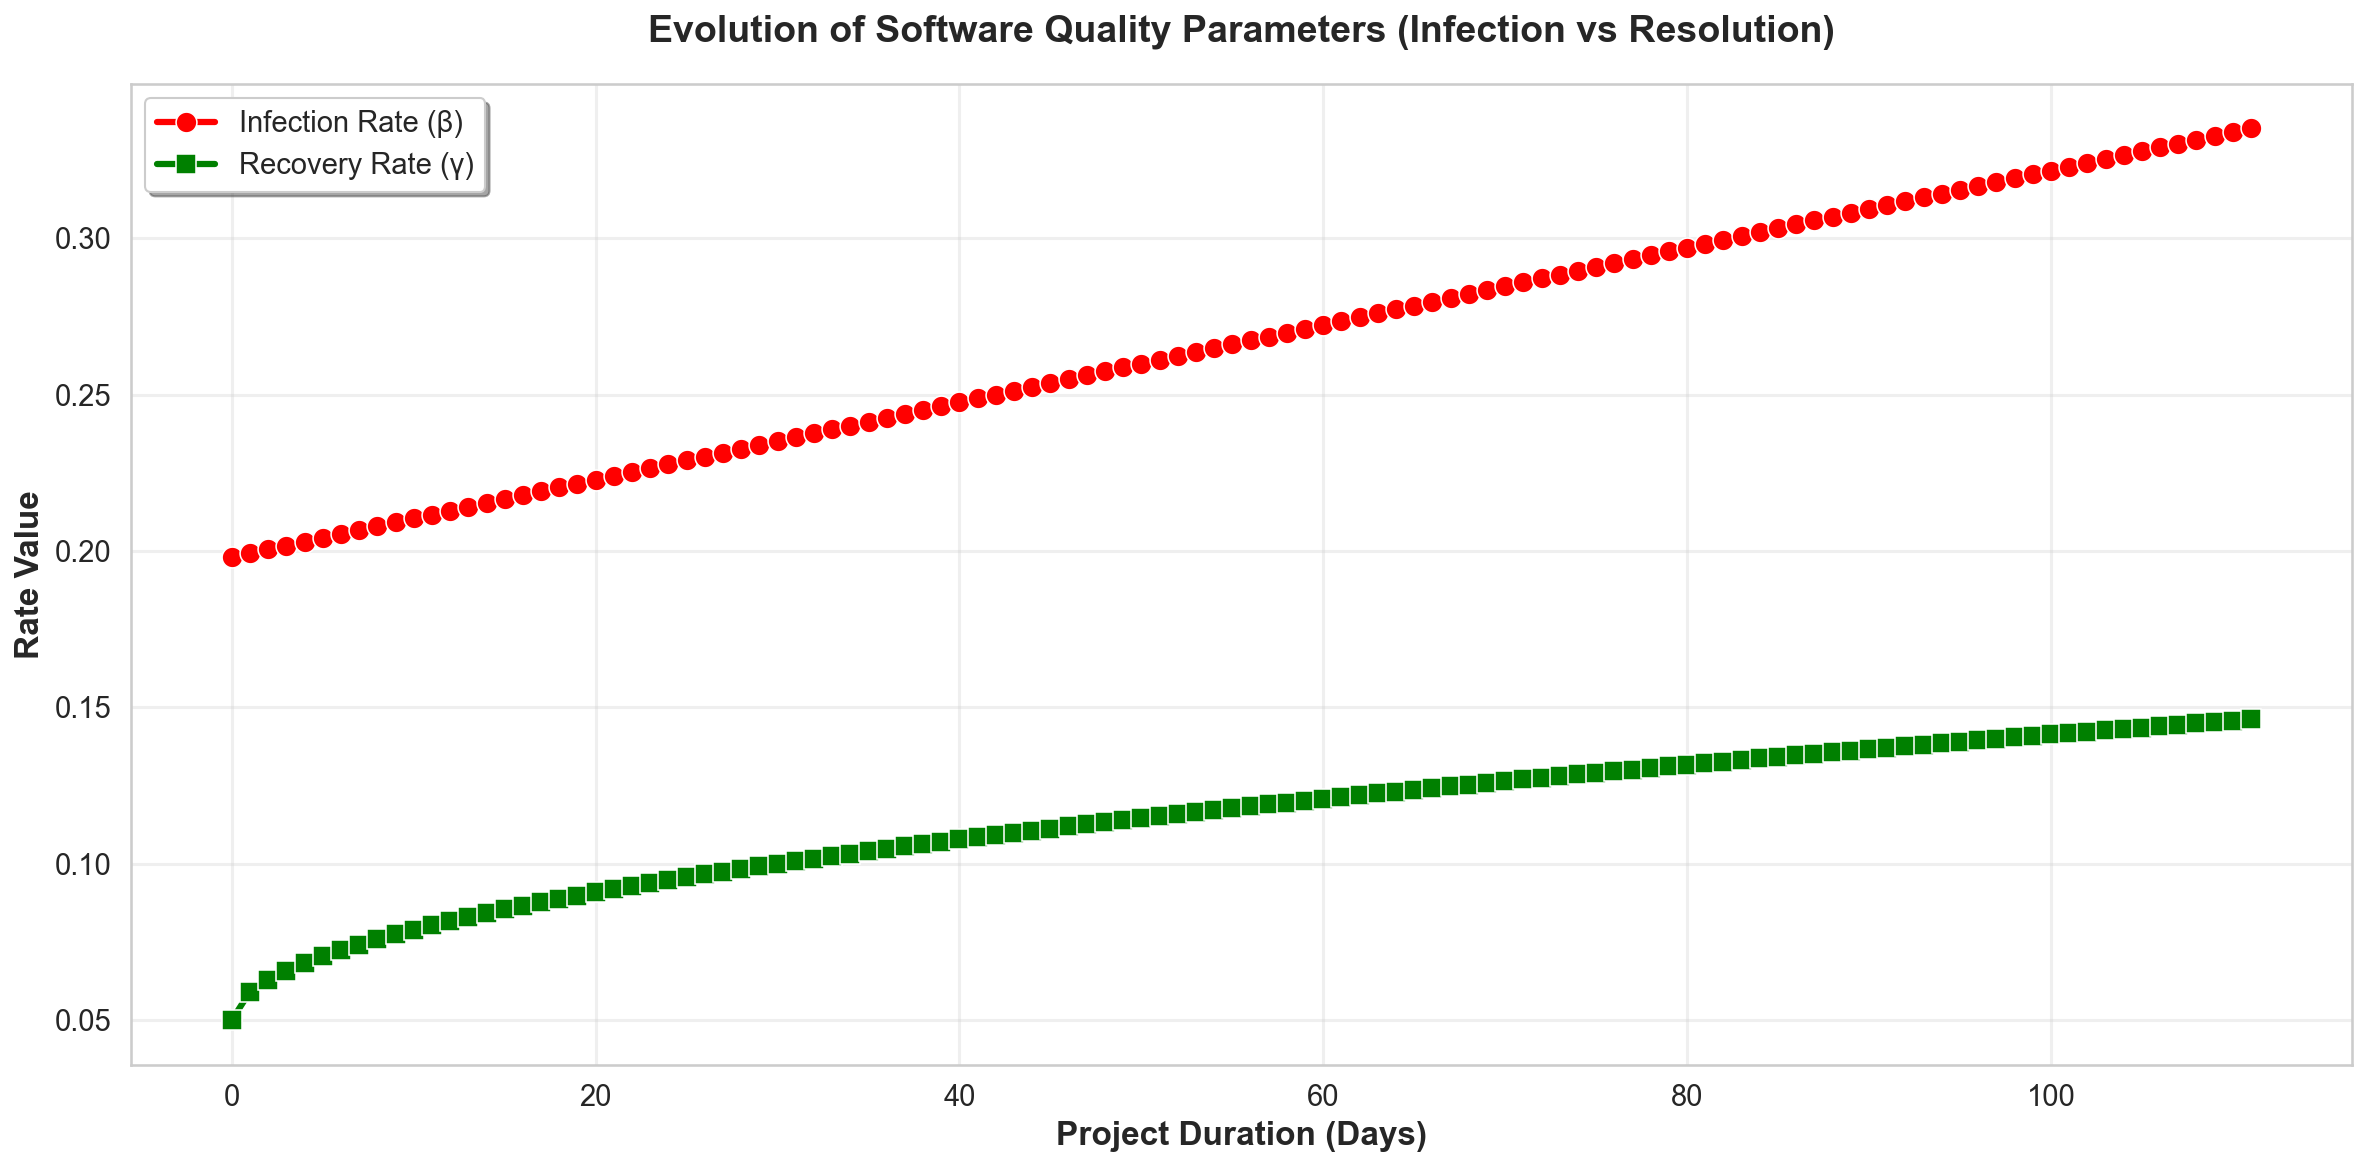

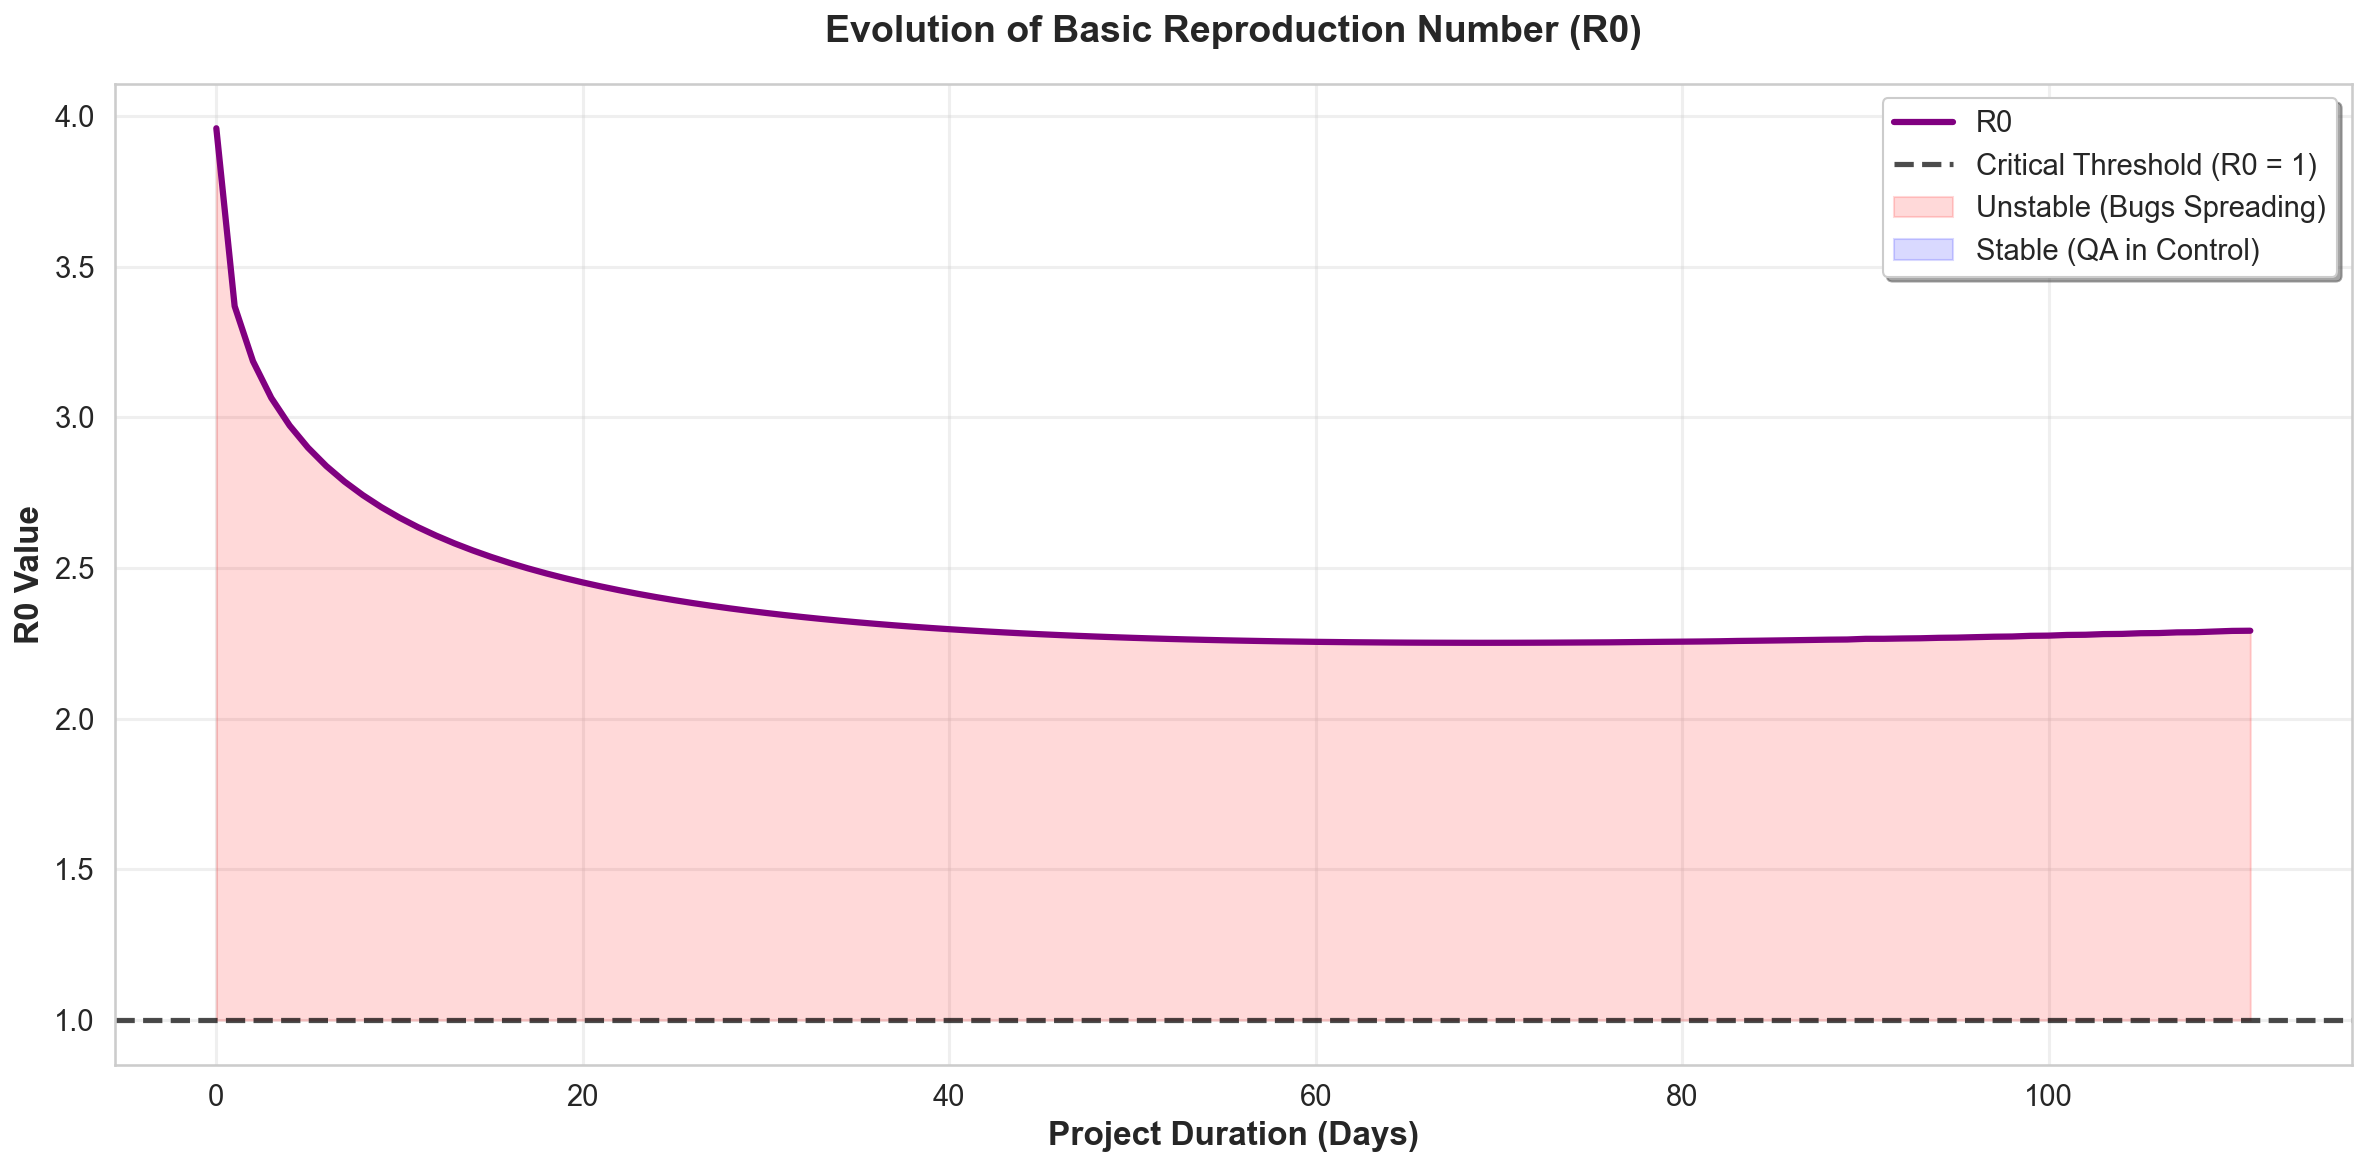

In [64]:

plot_infection_recovery_rates(days, sir_model.infection_rates, sir_model.recovery_rates)


plot_r0_evolution(days, sir_model.infection_rates, sir_model.recovery_rates)

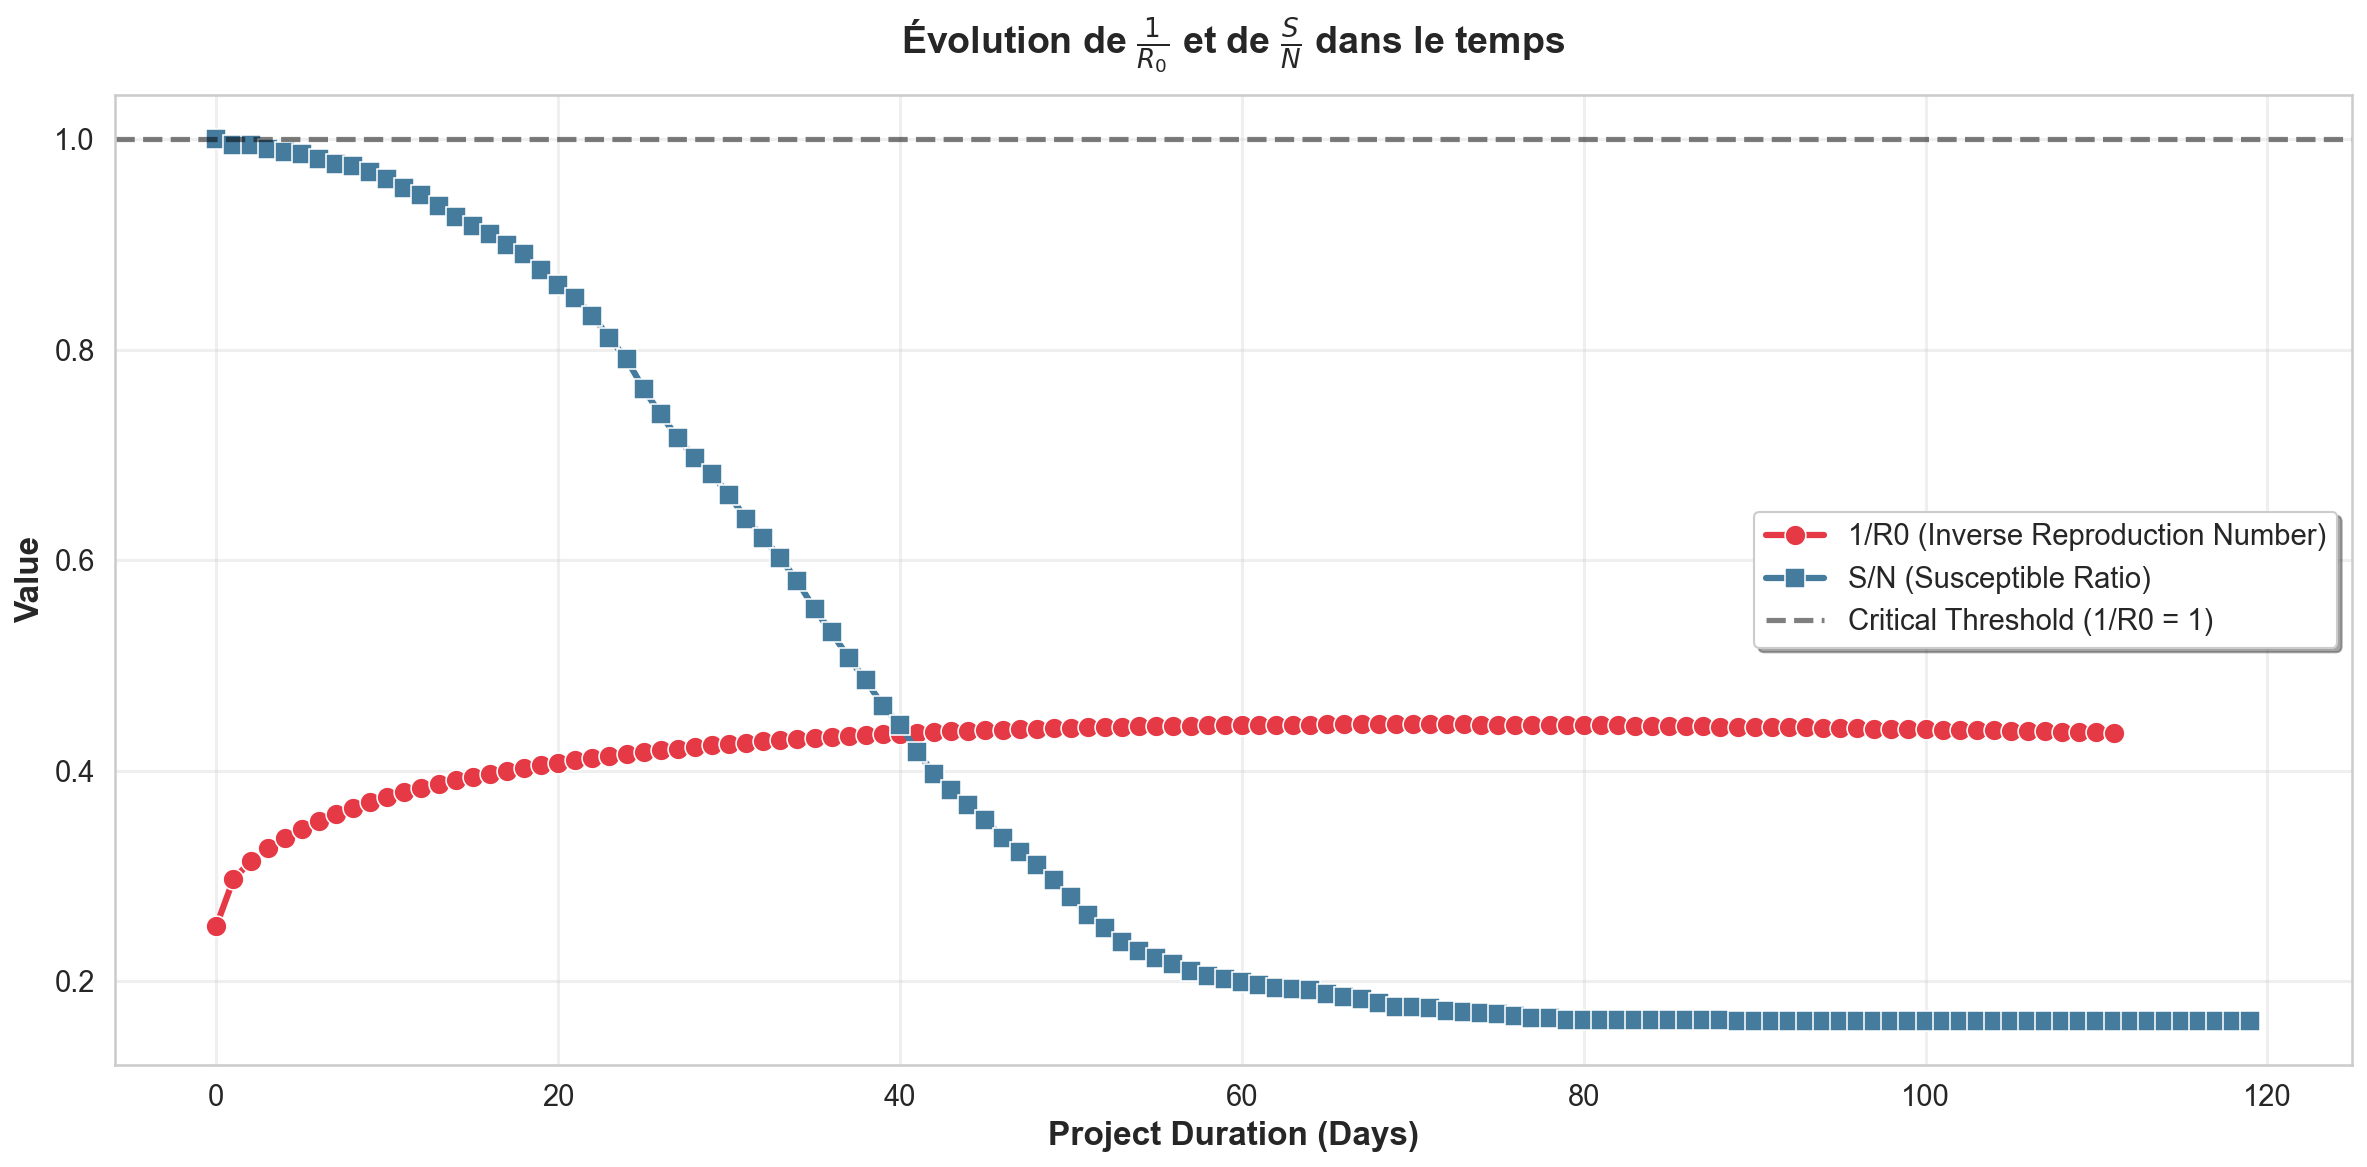

In [65]:
plot_inverse_r0_and_susceptible_ratio(days, sir_model.infection_rates, sir_model.recovery_rates, data, N=990)
